# Beat Tracking with Librosa
---

-- Onset Detection and Dynamic Programming --

Reference: https://www.analyticsvidhya.com/blog/2018/02/audio-beat-tracking-for-music-information-retrieval/

## Theory:

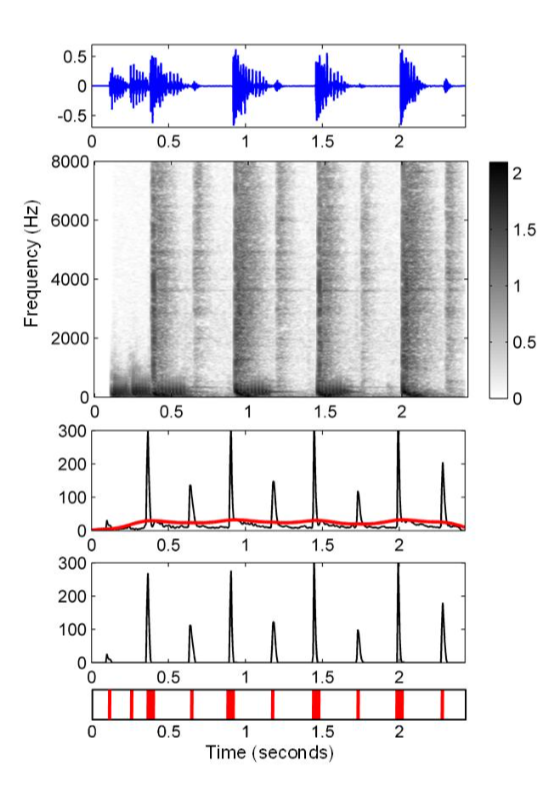

### Import Module

In [1]:
import pyaudio
import numpy as np
import librosa 

### Step 1: Audio File Input

In [2]:
try:
    x, fs = librosa.load('demo.mp3') 
except:
    raise IOError("!!!!!!!!!!!!!!!!!!!!!!!!!")

### Step 2: Beat Tracking

In [3]:
tempo, beat_times = librosa.beat.beat_track(x, sr = fs, start_bpm = 60, units = 'time')
print(beat_times)

[ 0.13931973  0.92879819  1.69505669  2.46131519  3.2275737   3.9938322
  4.7600907   5.50312925  6.2461678   7.0124263   7.75546485  8.4985034
  9.24154195 10.00780045 10.750839   11.49387755 12.26013605 13.0031746
 13.74621315 14.4892517  15.23229025 15.99854875 16.7415873  17.48462585
 18.2276644  18.97070295 19.73696145 20.45678005 21.19981859 21.9660771
 22.75555556 23.4985941  24.26485261 25.00789116 25.75092971 26.49396825
 27.26022676 27.98004535 28.74630385]


In [4]:
clicks = librosa.clicks(beat_times, sr = fs, length = len(x))

In [5]:
data = x + clicks

### Step 3: Audio File Output

In [6]:
p = pyaudio.PyAudio()
stream = p.open(format = pyaudio.paFloat32, channels = 1, rate = fs, output = True)
stream.write(data.astype(np.float32).tostring())

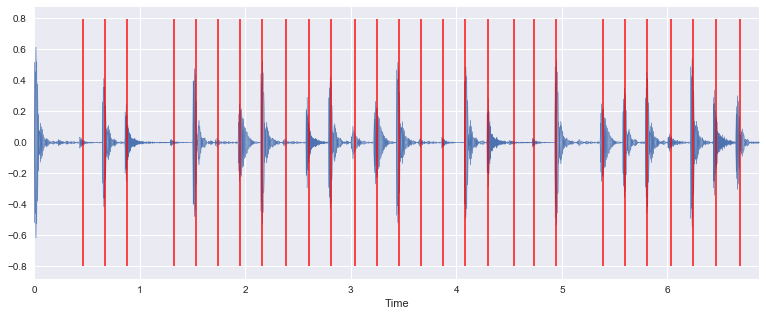

## It's Your Turn !

### Mission: 
#### (1) Generate a different kind of tempo (twice, one half, ...) for "Demo.mp3" then Add clicks for output beat times and write it to an audio file. 
#### (2) Discuss what is the code doing and the corresponding principle at Step 2: Beat tracking